In [1]:
# Pandas y otros
import pandas as pd
import numpy as np

In [3]:
# Mathplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)

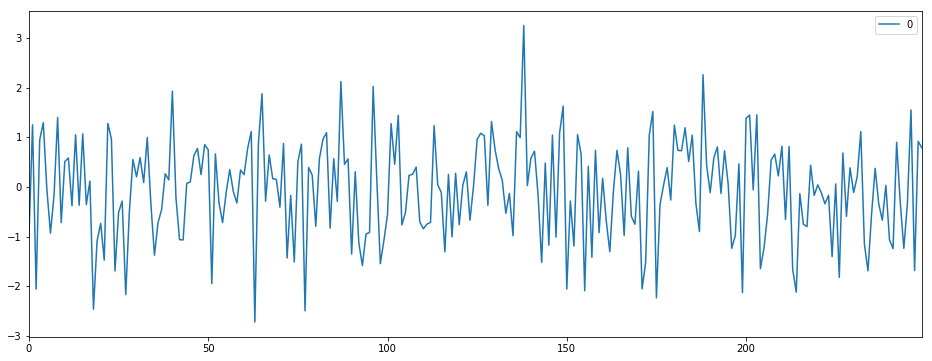

In [9]:
data = pd.DataFrame(np.random.randn(250))
data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11319f160>]], dtype=object)

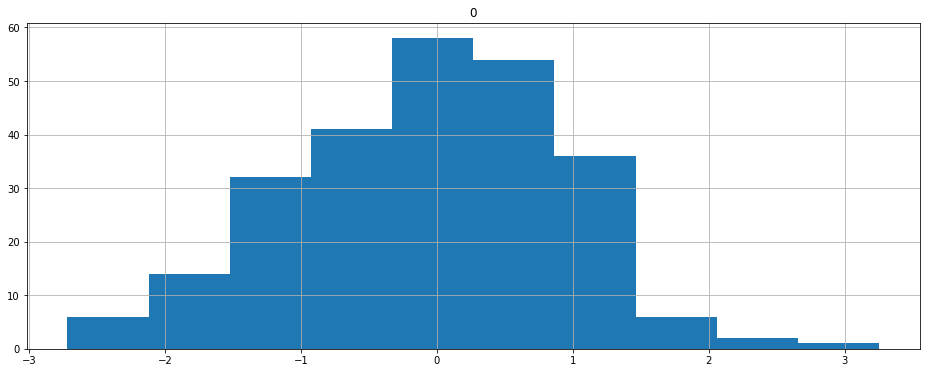

In [10]:
data.hist()

In [11]:
data.std()

0    1.005071
dtype: float64

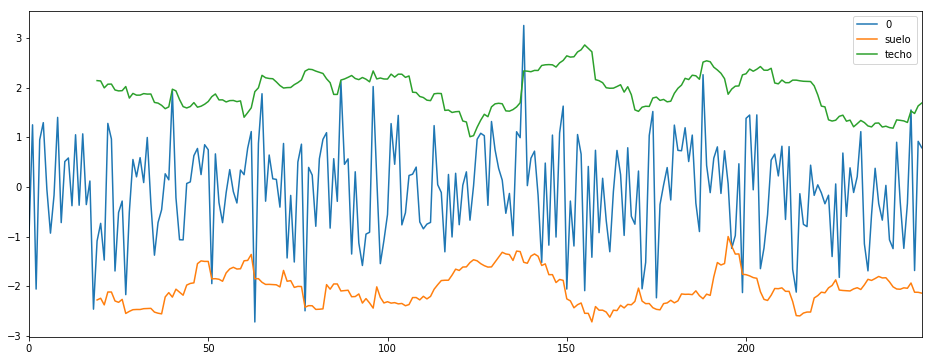

In [12]:
wind = 20
sigma = 2

data["suelo"] = data[0].rolling(window=wind)\
    .mean() - (sigma * data[0].rolling(window=wind).std())
data["techo"] = data[0].rolling(window=wind)\
    .mean() + (sigma * data[0].rolling(window=wind).std())
data.plot()

In [13]:
data["anom"] = data.apply(
    lambda row: row[0] if (row[0]<=row["suelo"] or row[0]>=row["techo"]) else 0, axis=1)

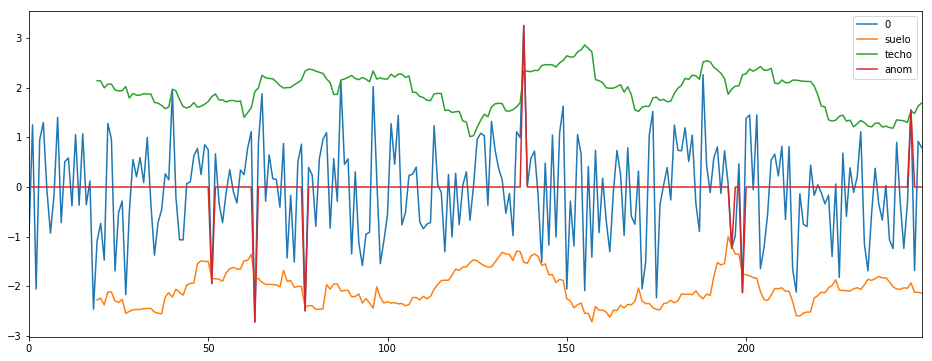

In [14]:
data.plot()

# Probando con datos reales

Query SQL de BigQuery
https://cloud.google.com/bigquery/public-data/github


```
SELECT
  COUNT(*) AS count,
  date(committer.date) AS date
FROM
  [bigquery-public-data:github_repos.commits]
WHERE 
  committer.date  > '2014-01-01 00:00'
  AND committer.date < '2018-01-01 00:00'
GROUP BY
  date
ORDER BY
  date ASC
    
```
    
github_commits_2014_2018.csv

In [15]:
data = pd.read_csv("github_commits_2014_2018.csv", index_col=1 )
data.head()

,count
date,
2014-01-01,33141
2014-01-02,58431
2014-01-03,61279
2014-01-04,45714
2014-01-05,46093


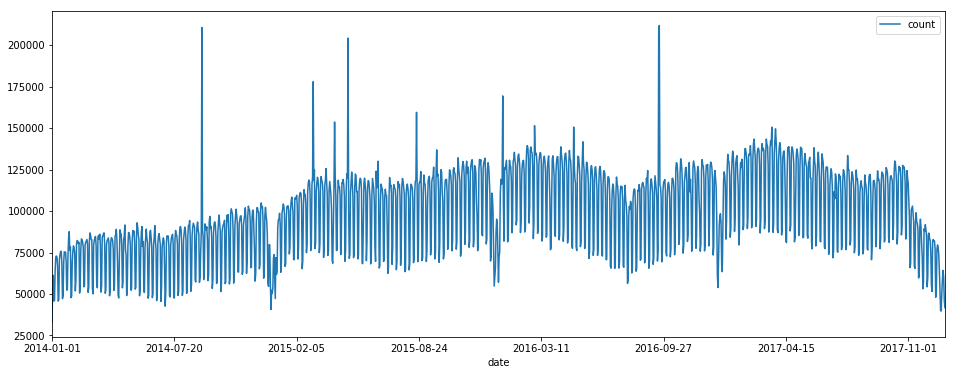

In [16]:
data.plot()

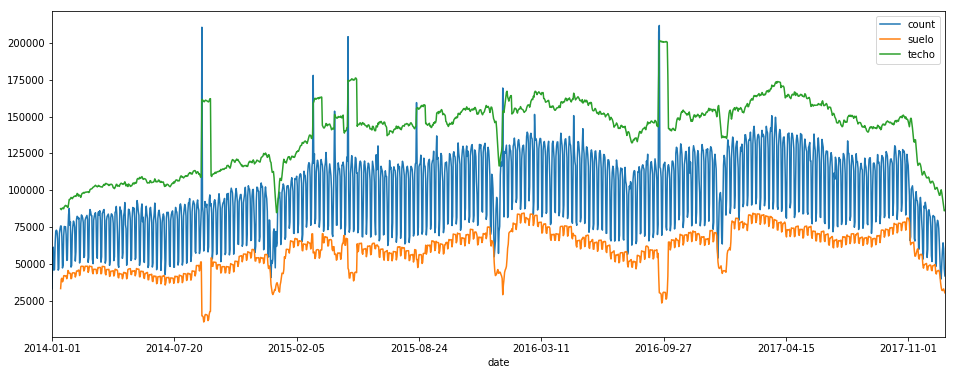

In [17]:
wind = 15
sigma = 2

data["suelo"] = data["count"].rolling(window=wind)\
    .mean() - (sigma * data["count"].rolling(window=wind).std())
data["techo"] = data["count"].rolling(window=wind)\
    .mean() + (sigma * data["count"].rolling(window=wind).std())
data.plot()

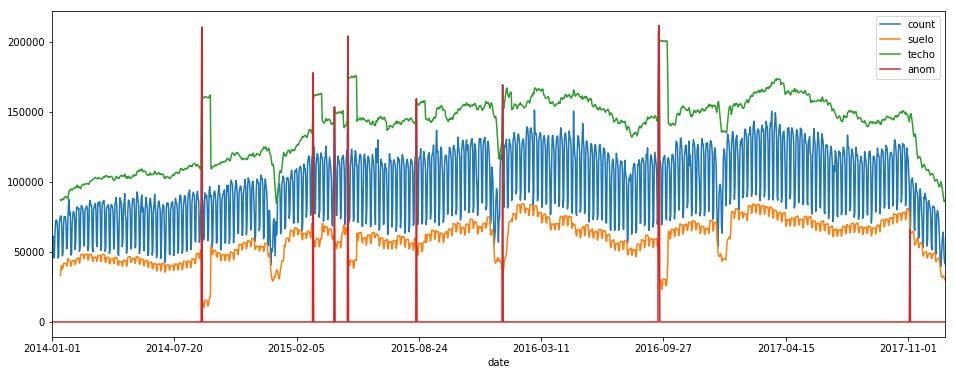

In [19]:
data["anom"] = data.apply(
    lambda row: row["count"] if (row["count"]<=row["suelo"] or row["count"]>=row["techo"]) else 0
, axis=1)
data.plot()